# Data Collection

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import tensorflow as tf
import torch as th
import re
import pickle as pkl
import warnings
warnings.filterwarnings('ignore')
from unidecode import unidecode
from scipy.stats import f_oneway
import requests
from IPython.display import Image, display, HTML
from wordcloud import WordCloud

In [2]:
# import dataset
df = pd.read_csv('dataset/books_1.Best_Books_Ever.csv')

In [3]:
# print the first 5 rows of the dataset
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [4]:
# Check the shape of df
df.shape

(52478, 25)

In [5]:
# Get the column names of df
df.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')

In [6]:
# Get information about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

In [7]:
# Get summary statistics for the numeric columns in df1
df.describe()

,rating,numRatings,likedPercent,bbeScore,bbeVotes
count,52478.000000,5.247800e+04,51856.000000,5.247800e+04,52478.000000
mean,4.021878,1.787865e+04,92.231545,1.984023e+03,22.529003
std,0.367146,1.039448e+05,5.990689,3.515314e+04,369.158541
min,0.000000,0.000000e+00,0.000000,0.000000e+00,-4.000000
25%,3.820000,3.410000e+02,90.000000,8.400000e+01,1.000000
50%,4.030000,2.307000e+03,94.000000,9.700000e+01,1.000000
75%,4.230000,9.380500e+03,96.000000,1.870000e+02,2.000000
max,5.000000,7.048471e+06,100.000000,2.993816e+06,30516.000000


# Data Preprocessing

In [8]:
# Drop columns that are not needed for analysis
df.drop(['series', 'bookId', 'characters', 'bookFormat', 'edition', 'publisher', 'firstPublishDate', 'awards', 'setting', 'bbeScore', 'bbeVotes', 'price'], axis=1, inplace=True)

In [9]:
# Check for missing values
df.isnull().sum()

title                0
author               0
rating               0
description       1338
language          3806
isbn                 0
genres               0
pages             2347
publishDate        880
numRatings           0
ratingsByStars       0
likedPercent       622
coverImg           605
dtype: int64

In [10]:
# Fill description text with string 'No description available'
df['description'] = df['description'].fillna('No description available')

In [11]:
# Fill language text with string 'Unknown'
df['language'] = df['language'].fillna('Unknown')

In [12]:
# Fill pages text with string 'No pages available'
df['pages'] = df['pages'].fillna('No pages available')

In [13]:
# Define a function to extract the year from a valid date
def extract_year(date_str):
    if pd.isnull(date_str):
        return 2999
    elif isinstance(date_str, str):
        try:
            year = pd.to_datetime(date_str, errors='coerce').year  # Extract the year
            if pd.notnull(year):
                return int(year)
            else:
                return 2999
        except ValueError:
            return 2999
    else:
        return 2999

# Apply the extract_year function to the 'publishDate' column
df['publishDate'] = df['publishDate'].apply(extract_year)

# Define a function to modify the year
def modify_year(year):
    if year > 2020 and year < 2999:
        year_str = str(year)
        if year_str.startswith('20'):
            year_str = '19' + year_str[2:]
        return int(year_str)
    return year

# Apply the modify_year function to the 'publishDate' column
df['publishDate'] = df['publishDate'].apply(modify_year)

In [14]:
# view publishDate column
df['publishDate']

0        2008
1        2004
2        2006
3        2000
4        2006
         ... 
52473    2011
52474    2011
52475    2011
52476    2011
52477    2011
Name: publishDate, Length: 52478, dtype: int64

In [15]:
# Check for missing values
df.isnull().sum()

title               0
author              0
rating              0
description         0
language            0
isbn                0
genres              0
pages               0
publishDate         0
numRatings          0
ratingsByStars      0
likedPercent      622
coverImg          605
dtype: int64

In [16]:
# Drop the duplicated rows
df.drop_duplicates(inplace=True)

In [17]:
# Define a dictionary to map genres to broader categories
genre_map = {
    'Romance': ['Romance', 'Historical Romance', 'Paranormal Romance', 'Contemporary Romance', 'Erotic Romance', 'Interracial Romance',
                'M M Romance', 'M F Romance', 'LGBT', 'Lesbian Romance', 'Fan Fiction', 'Romantic', 'BDSM', 'Love', 'Erotica', 'Menage',
                'Reverse Harem'],
    'Science Fiction': ['Science Fiction', 'Dystopia', 'Steampunk', 'Time Travel', 'Cyberpunk', 'Alternate History', 'Space', 'Aliens',
                        'Speculative Fiction', 'Science Fiction Fantasy'],
    'Fantasy': ['Fantasy', 'Fiction Fantasy', 'Urban Fantasy', 'Epic', 'High Fantasy', 'Dark Fantasy', 'Mythology', 'Fairy Tales',
                'Fairy Tale Retellings', 'Fairies', 'Elves', 'Folklore'],
    'Historical Fiction': ['Historical Fiction', 'Historical Romance', 'World War II', 'Regency'],
    'Contemporary': ['Contemporary', 'New Adult', 'Realistic Fiction', 'Chick Lit'],
    'Young Adult': ['Young Adult', 'Teen', 'Middle Grade', 'High School'],
    'Comics': ['Comics', 'Manga', 'Dc Comics', 'Comic Strips', 'Harlequin Heartwarming'],
    'Mystery': ['Crime', 'Mystery', 'Thriller', 'Suspense', 'Mystery Thriller', 'True Crime', 'Cozy Mystery', 'Historical Mystery',
                'Detective', 'Espionage', 'Action', 'Psychological Thriller' ],
    'Horror': ['Horror', 'Paranormal', 'Gothic', 'Supernatural', 'Ghost Stories'],
    'LGBTQ+': ['LGBTQ+', 'LGBTQ', 'Queer', 'Asexual'],
    'Literary Fiction': ['Literary Fiction', 'Classics', 'Novels', 'Literary Criticism', 'Anthologies'],
    'Poetry': ['Poetry'],
    'Foreign Literature': ['Language', 'Finnish Literature', 'Hungarian Literature', 'Japanese Literature', 'French Literature',
                           'Indian Literature', 'British Literature', 'Egyptian Literature'],
    'Biography/Autobiography': ['Biography/Autobiography', 'Memoir', 'True Story'],
    'History': ['History', 'Historical', 'Ancient History', 'Medieval'],
    'Science': ['Science', 'Science/Popular Science', 'Popular Science', 'Space', 'Computer Science', 'Dogs', 'Medicine', 'Computers',
                'Artificial Intelligence', 'Metaphysics', 'Physics', 'Ecology', 'Chemistry'],
    'Self-Help': ['Self-Help', 'Personal Development', 'Prayer', 'Christian Living', 'Counselling', 'Mental Illness'],
    'Business/Finance': ['Business/Finance', 'Economics', 'Management', 'Money'],
    'Health/Fitness': ['Health/Fitness', 'Medical', 'Martial Arts', 'Nutrition', 'Mountaineering', 'Cycling', 'Outdoors'],
    'Memoir': ['Memoir', 'Autobiography', 'Memoirs'],
    'True Crime': ['True Crime'],
    'Politics/Current Affairs': ['Politics/Current Affairs', 'Political', 'Current Affairs'],
    'Psychology/Social Sciences': ['Psychology/Social Sciences', 'Psychology', 'Social Sciences'],
    'Reference': ['Reference', 'Reference Books', 'Law', 'Communication', 'Survival', 'Sewing', 'Gardening', 'Aviation', 'Nursing', 'Teaching'],
    'Religion/Spirituality': ['Spirituality', 'Religion', 'Christianity', 'New Testament', 'Church', 'Holiday', 'Halloween', 'Magick',
                              'Witchcraft', 'Magical Realism', 'Witches'],
    'Cooking': ['Cooking', 'Cookbooks'],
    'Travel': ['Travel', 'Travelogue'],
    'Cultural/Geography': ['Geography', 'Italy', 'India', 'Israel', 'Australia', 'Brazil', 'Romania', 'Scotland', 'Cultural', 'Iran',
                           'Ethiopia', 'New York'],
    'Other': ['Plays', 'Pirates', 'Role Playing Games', 'Forgotten Realms', 'Lds', 'Comedy', 'Games', 'Family', 'Games',
              'Conspiracy Theories', 'Diary', 'Baha I', 'Chapter Books', 'Journalism', 'Nerd', '21st Century',
              'Journal', 'Unfinished', 'Pulp', 'Gaming', 'Academic', 'Own', 'Warcraft', 'Semiotics']
}

In [18]:
# Replace empty brackets with empty strings in the 'genres' column
df['genres'] = df['genres'].str.replace('[\[\]]', '')

# Split the 'genres' column into separate columns for each genre
genres = df['genres'].str.split(',', expand=True)
genres.columns = [f'genre{i}' for i in range(1, 11)]
df = pd.concat([df, genres], axis=1)

# Remove apostrophes from genre columns and fill missing values with 'Unknown'
for col in genres.columns:
    df[col] = df[col].str.replace("'", '').fillna('Unknown')


def map_genres(genre):
    for key, value in genre_map.items():
        if genre in value:
            return key
    return 'Other'


# Apply the map_genres function to the genre columns and create a new 'genre' column
df['genre'] = df[[f'genre{i}' for i in range(1, 11)]].apply(lambda x: map_genres(x.dropna().iloc[0]), axis=1)

# Fill missing values in the 'genre' column with 'Unknown'
df['genre'] = df['genre'].fillna('Unknown')

# Drop the genre columns
df.drop([f'genre{i}' for i in range(1, 11)], axis=1, inplace=True)

# Drop the 'genres' column
df.drop('genres', axis=1, inplace=True)

In [19]:
# Text cleaning
df['title'] = df['title'].apply(unidecode)
df['author'] = df['author'].apply(unidecode)
df['description'] = df['description'].apply(unidecode)

In [20]:
# Extract the first author and remove additional text
df['author'] = df['author'].str.split(',').str[0]

# Remove the "(Goodreads Author)" text after the author's name
df['author'] = df['author'].str.replace(r'\s+\(Goodreads Author\)$', '')

In [21]:
# Save cleaned data to a new CSV file in the working directory
df.to_csv('cleaned_books.csv', index=False)

# Data Exploration and Visualization

In [22]:
# Load the cleaned data from the CSV file into a new DataFrame
books = pd.read_csv('cleaned_books.csv')

In [23]:
# Statistical summary of the DataFrame
books.describe()

,rating,publishDate,numRatings,likedPercent
count,52424.000000,52424.000000,5.242400e+04,51803.000000
mean,4.021885,2039.965073,1.789390e+04,92.232342
std,0.367103,180.284511,1.039971e+05,5.988173
min,0.000000,1820.000000,0.000000e+00,0.000000
25%,3.820000,2003.000000,3.410000e+02,90.000000
50%,4.030000,2009.000000,2.310500e+03,94.000000
75%,4.230000,2013.000000,9.389500e+03,96.000000
max,5.000000,2999.000000,7.048471e+06,100.000000


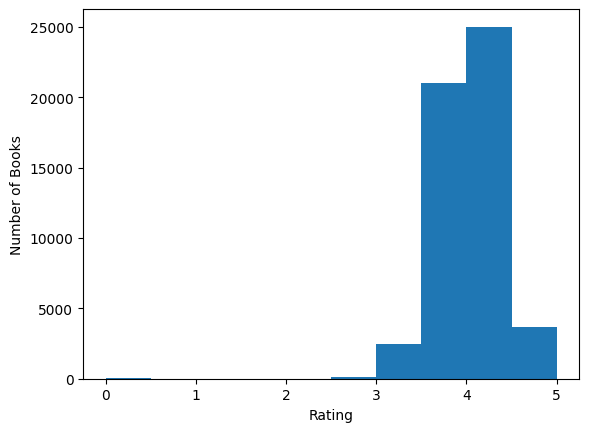

In [24]:
# plot a histogram of the ratings
plt.hist(books['rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Number of Books')
plt.show()

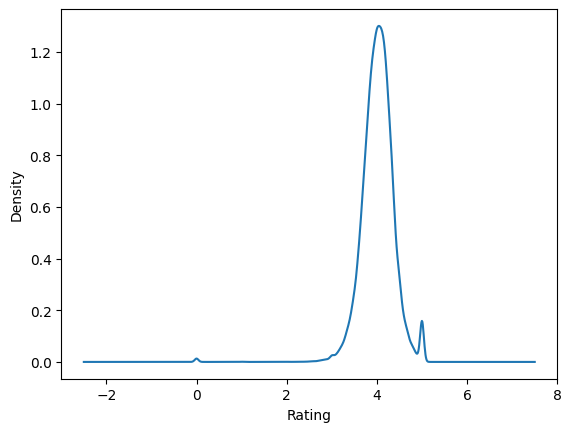

In [25]:
# plot a density plot of the ratings
books['rating'].plot(kind='density')
plt.xlabel('Rating')
plt.show()

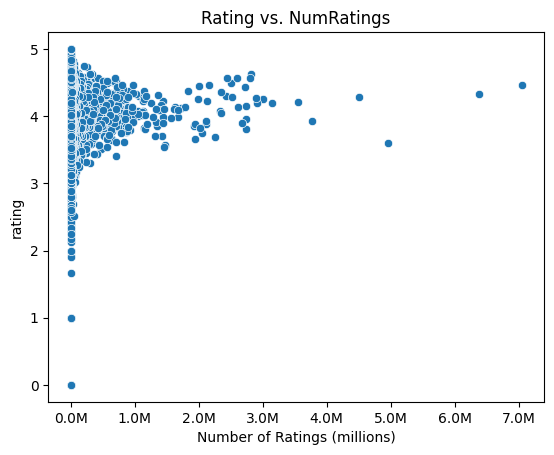

In [26]:
# Create a scatter plot of rating vs. numRatings
sns.scatterplot(x='numRatings', y='rating', data=books)
plt.xlabel('Number of Ratings (millions)')

# Format the x-axis tick labels to show values in millions
formatter = mtick.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x/1e6))
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Rating vs. NumRatings')
plt.show()

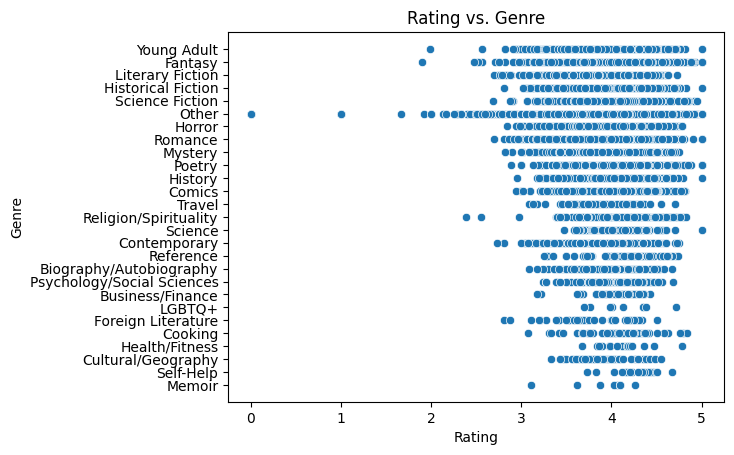

In [27]:
# Create a scatter plot of rating vs. genre (using the map_genres function)
sns.scatterplot(x='rating', y='genre', data=books)
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.title('Rating vs. Genre')
plt.show()

In [28]:
# Convert 'publishDate' to string format
books['publishDate'] = books['publishDate'].astype(str)

# Create a decades column
books['decade'] = books['publishDate'].str[:3] + '0s'

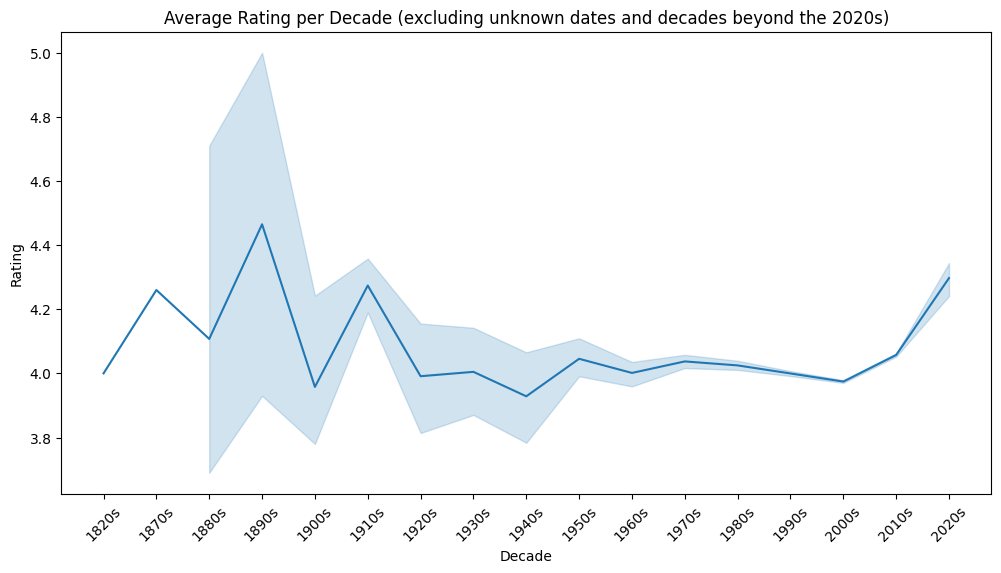

In [29]:
# Filter the books DataFrame to exclude rows with null values in the decade column
books_filtered = books[books['decade'].notnull()]

# Filter the books_filtered DataFrame to exclude decades beyond the 2020s
books_filtered = books_filtered[books_filtered['decade'] <= '2020s']

# Sort the decade column in ascending order
books_filtered.sort_values('decade', inplace=True)

# Create a new column with the decade as a categorical variable
books_filtered['decade_cat'] = pd.Categorical(books_filtered['decade'], categories=books_filtered['decade'].unique(), ordered=True)

# Plot the average rating per decade
fig = plt.figure(figsize=(12, 6))
sns.lineplot(x='decade_cat', y='rating', data=books_filtered)
plt.xlabel('Decade')
plt.ylabel('Rating')
plt.title('Average Rating per Decade (excluding unknown dates and decades beyond the 2020s)')
plt.xticks(rotation=45)
plt.show()

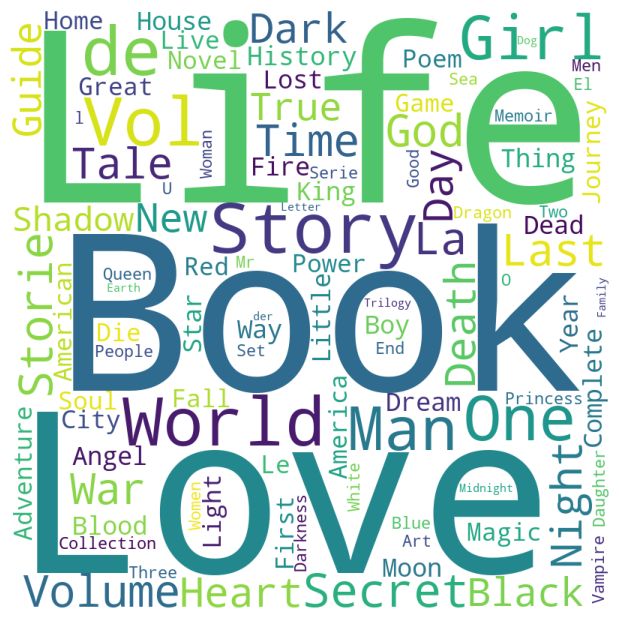

In [30]:
# Create a word cloud of the most common words in the title column
title_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, collocations=False).generate(' '.join(books['title']))

# Display the word cloud
plt.figure(figsize=(10, 6), facecolor=None)
plt.imshow(title_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

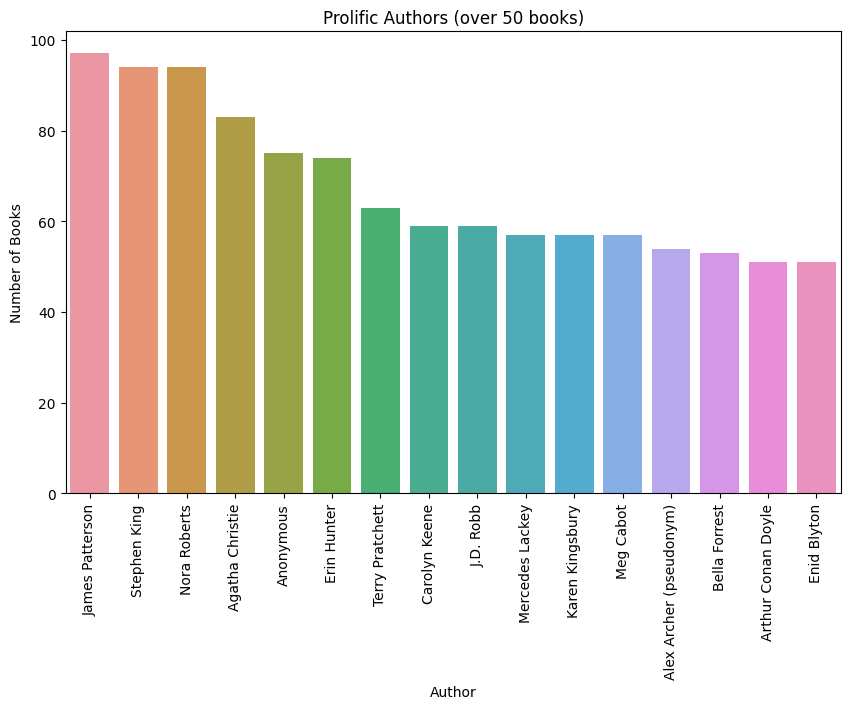

In [31]:
# Get the number of books for each author
author_counts = df['author'].value_counts()
author_counts_filtered = author_counts[author_counts > 50]  # Filter authors with over 50 books

# Plot the number of books for each author in a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=author_counts_filtered.index, y=author_counts_filtered.values)
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title('Prolific Authors (over 50 books)')
plt.xticks(rotation=90)
plt.show()

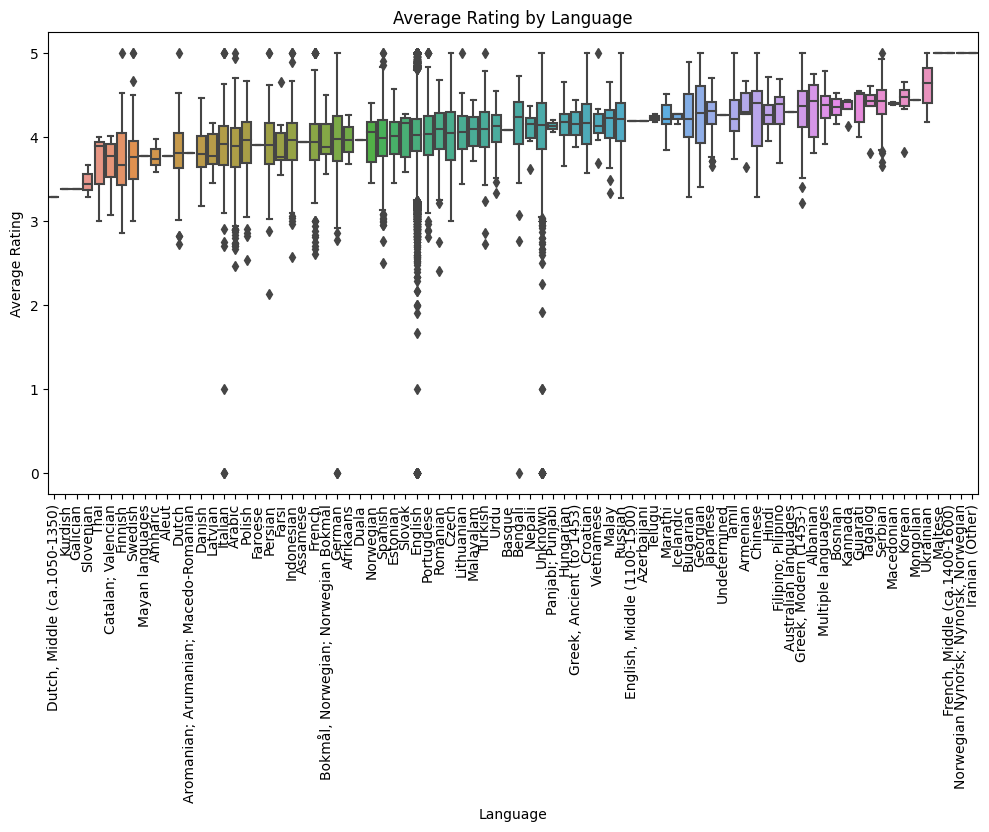

In [32]:
# Calculate the average rating for books in each language
avg_rating_by_language = books.groupby('language')['rating'].mean().sort_values()

# Visualize the average ratings using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=books['language'], y=books['rating'], order=avg_rating_by_language.index)
plt.xlabel('Language')
plt.ylabel('Average Rating')
plt.title('Average Rating by Language')
plt.xticks(rotation=90)
plt.show()

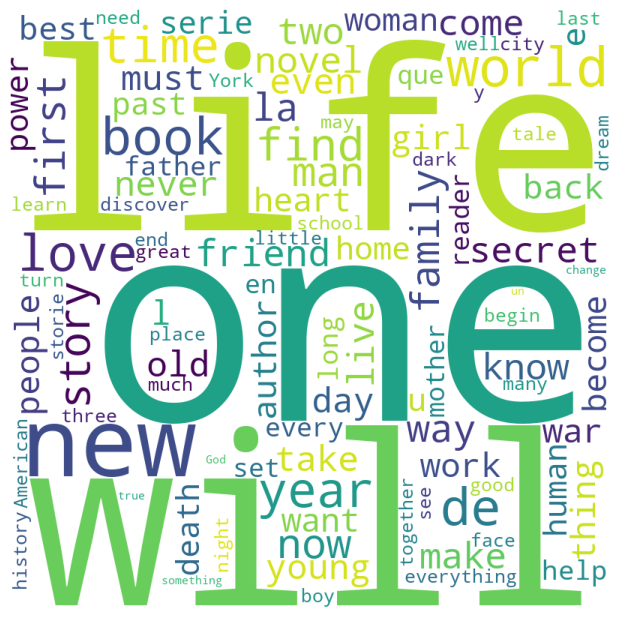

In [33]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, collocations=False).generate(' '.join(books['description']))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [34]:
# Drop decade, numRatings, isbn, pages, and publishDate columns
books.drop(['decade', 'numRatings', 'isbn', 'pages', 'publishDate'], axis=1, inplace=True)

# Reorder the columns
books = books[['title', 'author', 'genre', 'rating', 'language', 'coverImg', 'description']]

# Save the updated dataset to a new CSV file
books.to_csv('dataset/final.csv', index=False)

# Model Building

In [36]:
# Load the cleaned data from the CSV file into a new DataFrame
books = pd.read_csv('dataset/final.csv')

In [37]:
# Reduce the DataFrame size to 25000 rows
books = books.head(25000)

In [38]:
# create a TfidfVectorizer object
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books['description'])
similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [39]:
def content_based_recommendation(book_title, books, similarity):
    # convert book titles to lowercase
    books['title_lower'] = books['title'].str.lower()
    book_title_lower = book_title.lower()

    # check if the book title exists in the dataframe
    if book_title_lower not in books['title_lower'].values:
        return pd.DataFrame({"Error": [f"Sorry, '{book_title}' is not found in the dataset."]})

    # get the index of the book that matches the title
    idx = books.loc[books['title_lower'] == book_title_lower].index[0]

    # get the pairwise similarity scores of all books with that book
    sim_scores = list(enumerate(similarity[idx]))

    # sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # get the scores of the 10 most similar books
    sim_scores = sim_scores[1:13]

    # get the book indices
    book_indices = [i[0] for i in sim_scores]

    # get the top 10 most similar books and their attributes
    recommended_books = books.iloc[book_indices][['title', 'author', 'coverImg', 'rating']]

    # reset the index of the dataframe
    recommended_books = recommended_books.reset_index(drop=True)

    return recommended_books

In [51]:
book_title = input("Enter a book title: ")

# Call the content_based_recommendation function to get the recommended books
recommended_books = content_based_recommendation(book_title, books, similarity)

# Check if the function returned an error message
if "Error" in recommended_books.columns:
    print(recommended_books["Error"][0])
else:
    # Display the recommended books as a table with cover images
    print(f"Recommended books for '{book_title}':")

    # Create an HTML table with the book cover images
    html = "<table><tr>"
    for index, row in recommended_books.iterrows():
        if index % 4 == 0 and index > 0:
            html += "</tr><tr>"
        html += f"<td><img src='{row['coverImg']}' width='100'><br><b>{row['title']}</b><br>Author: {row['author']}<br>Rating: {row['rating']}</td>"
    html += "</tr></table>"

    # Display the HTML table
    display(HTML(html))

Recommended books for 'Fifty Shades Darker':


Fifty Shades TrilogyAuthor: E.L. JamesRating: 4.11,Fifty Shades FreedAuthor: E.L. JamesRating: 3.85,Dreaming AnastasiaAuthor: Joy PrebleRating: 3.47,DarkerAuthor: E.L. JamesRating: 4.09
Fifty Shades of GreyAuthor: E.L. JamesRating: 3.66,GreyAuthor: E.L. JamesRating: 3.79,Fifty-one Shades: A Parody (First Three Chapters)Author: Andrew ShafferRating: 3.48,"Anastasia: The Last Grand Duchess, Russia, 1914Author: Carolyn MeyerRating: 3.91"
StayAuthor: Deb CalettiRating: 3.88,Dragon's OathAuthor: P.C. CastRating: 4.07,The Nightlife: Las VegasAuthor: Travis LuedkeRating: 3.85,Destined to PlayAuthor: Indigo BloomeRating: 3.16


# Conclusion

# References
1. [Comprehensive Literary Greats Dataset](https://www.kaggle.com/datasets/thedevastator/comprehensive-literary-greats-dataset)
2. [Book Recommendation System](https://medium.com/@amitdlmlai/book-recommendation-system-61bf9284f659)
3. [Book Recommendation System using KNN](https://machinelearninggeek.com/book-recommender-system-using-knn/)